# 이미지 기반 지표값 추출 예제 
- 본 예제는 UI에서 기본적으로 제공된 기능 이외에 추가적인 지표추출이 필요한 경우 사용자가 활용하실 수 있도록 작성된 코드입니다. 목차는 다음과 같습니다. 
1. RGB 이미지 처리 
2. Thermal 이미지 처리
3. 엽록소 형광 이미지 처리
- 주석 처리된 설명 (#)을 중심으로 예제를 진행하시면 어려움 없이 이해하실 수 있습니다. 

## PlantCV VS Code 관련 이슈
- notebook, ipywidgets 설치 필요
- VS Code 에서 jupyter notebook 관련 extension 설치
- 셀 렌더링 시, Javascript Error 가 발생하는 경우, VS Code -> 기본 설정 -> 설정 -> Jupyter: Widget Script Sources 에서 'jsdelivr.com', 'unpkg.com' 추가

<hr>

## 1. RGB 이미지 처리

In [4]:
os.getcwd()

'/Users/jaekunpark/Downloads/Final_RDA_Drill/notebook'

In [5]:
# 라이브러리 import
# 이 부분은 Python에서 추가 기능을 사용하기 위해 필요한 외부 라이브러리를 불러오는 코드입니다.
import os  # 운영 체제와의 상호작용을 위한 모듈
import cv2  # 컴퓨터 비전 라이브러리로 이미지 처리에 사용
import numpy as np  # 수치 연산을 위한 라이브러리
import matplotlib.pyplot as plt  # 데이터를 시각화(그래프)할 때 사용하는 라이브러리
import ipywidgets  # 대화형 위젯을 만들기 위한 모듈
#import altair  # 데이터를 시각적으로 표현하기 위한 도구
from plantcv import plantcv as pcv  # PlantCV는 식물 이미지 분석을 위한 라이브러리
from plantcv.parallel import WorkflowInputs  # PlantCV에서 병렬 처리 작업을 위한 도구

# 주피터 노트북 환경에서 그래프를 위젯으로 표시하기 위한 설정
#%matplotlib widget

# 현재 작업 중인 디렉터리(폴더) 경로를 출력합니다. 
# 이 작업은 파일을 저장하거나 불러올 때 어디에서 작동하고 있는지를 확인하는 데 유용합니다.
print(os.getcwd())

# PlantCV 라이브러리 설정
# PlantCV는 식물 이미지를 분석하는 데 도움을 주는 도구입니다.
# 'WorkflowInputs'는 이미지 파일과 관련 설정을 정의하는 클래스입니다.
args = WorkflowInputs(
    images=["../img_src/PlantCV/images.jpeg"],  # 분석할 이미지 파일 이름을 지정합니다. 여기서는 'images.jpeg'라는 파일을 불러옵니다. 같은 폴더에 있지 않다면, 경로를 포함한 파일 이름을 지정해야 합니다.
    names="image",  # 이미지 이름을 'image'로 지정
    result="example_results_image_file.json",  # 분석 결과를 저장할 파일 이름을 지정합니다.
    outdir="../results/PlantCV",  # 현재 디렉터리에 결과 파일을 저장하도록 지정합니다.
    writeimg=False,  # 이미지를 저장할지 여부를 설정합니다. 여기서는 False로 설정하여 이미지를 저장하지 않습니다.
    debug="plot"  # 디버깅 모드를 'plot'으로 설정하면, 이미지가 처리되는 중간 과정을 시각적으로 확인할 수 있습니다.
    )

# PlantCV의 전역 설정 중 하나인 debug 옵션을 설정합니다.
pcv.params.debug = args.debug

# PlantCV 이미지 출력 옵션 설정
# DPI는 이미지의 해상도를 의미합니다. 100 DPI로 설정하면 화면에 표시될 이미지의 해상도가 조정됩니다.
pcv.params.dpi = 100

# 이미지에 표시되는 텍스트 크기를 1로 설정합니다.
pcv.params.text_size = 1

# 이미지에 텍스트를 표시할 때 텍스트의 두께를 3으로 설정합니다.
pcv.params.text_thickness = 3

# 이미지에서 라인(선)을 그릴 때의 두께를 3으로 설정합니다.
pcv.params.line_thickness = 3

/Users/jaekunpark/Downloads/Final_RDA_Drill/notebook


### 이미지 파일 불러오기

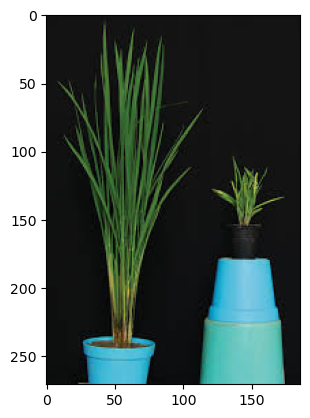

In [6]:
# pcv.readimage는 PlantCV 라이브러리에서 제공하는 함수로, 이미지를 불러오는 데 사용됩니다.
# 이 코드에서는 'args.image'로 지정된 파일을 읽어오고 있습니다.
# mode='rgb'는 이미지를 RGB 모드로 불러온다는 것을 의미합니다. RGB는 Red, Green, Blue로 이미지 색상 정보를 표현하는 방식입니다.

img, path, filename = pcv.readimage(filename=args.image, mode='rgb')

# 불러온 이미지는 'img' 변수에 저장되고,
# 이미지가 있는 경로는 'path'에,
# 이미지 파일 이름은 'filename'에 각각 저장됩니다.

### 이미지 자르기 (Crop)

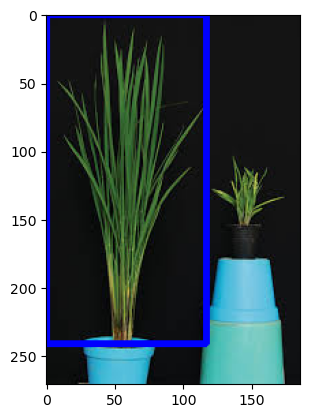

In [7]:
# 이 코드는 불러온 이미지를 지정된 크기로 자르는 작업을 수행합니다.
# pcv.crop 함수는 이미지의 특정 영역을 잘라내는 기능을 제공합니다.
# 여기서는 x=0, y=0 좌표에서 시작하여 가로(w) 118, 세로(h) 242 크기의 영역을 자릅니다.

img = pcv.crop(
    img=img,  # 자를 대상 이미지
    x=0,  # 이미지에서 자를 시작 지점의 x좌표 (왼쪽에서 0픽셀 떨어진 위치)
    y=0,  # 이미지에서 자를 시작 지점의 y좌표 (위쪽에서 0픽셀 떨어진 위치)
    h=242,  # 자를 이미지의 높이 (242 픽셀)
    w=118  # 자를 이미지의 너비 (118 픽셀)
)

# 요약:
# 이 코드는 좌표 (0, 0)에서부터 시작해 242x118 크기의 이미지 영역을 잘라냅니다.
# 이 과정은 이미지에서 특정 부분만을 분석하고자 할 때 유용합니다.

### 색상 공간 변환 및 시각화

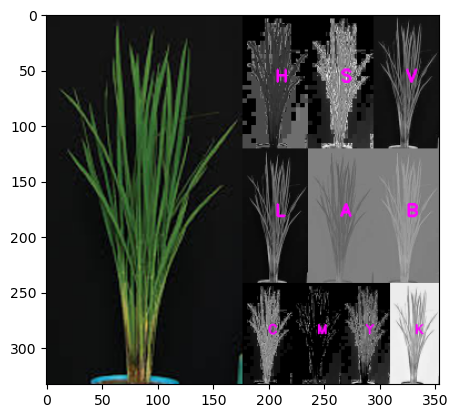

In [8]:
# pcv.visualize.colorspaces 함수는 주어진 이미지를 다양한 색상 공간으로 변환하고 그 결과를 시각화합니다.
# 색상 공간은 이미지에서 색을 표현하는 방법을 의미하며, 일반적으로 사용하는 RGB 외에도 HSV, LAB, CMYK 등 여러 가지가 있습니다.
# 여기서 'colorspace_img' 변수는 변환된 이미지 데이터를 저장하게 됩니다.

colorspace_img = pcv.visualize.colorspaces(
    rgb_img=img  # 변환할 이미지 (RGB 색상 공간을 사용하고 있음)
)

# 요약:
# 이 코드는 이미지의 색상 공간을 변환하고, 그 결과를 'colorspace_img'에 저장합니다.
# 색상 공간을 다르게 변환하는 이유는 이미지 분석에서 특정 색상이나 명도 등의 정보를 더 쉽게 추출할 수 있기 때문입니다.

### RGB 이미지를 LAB 색상 공간으로 변환하고, B 채널 추출

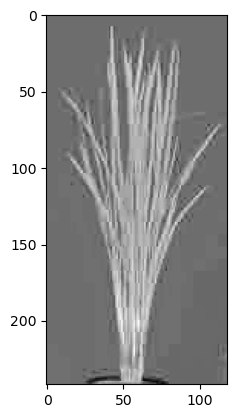

In [9]:
# pcv.rgb2gray_lab 함수는 RGB 이미지를 LAB 색상 공간으로 변환한 후,
# 해당 색상 공간에서 'b' 채널(푸른색 정도)을 추출하여 회색조 이미지로 변환합니다.
# LAB 색상 공간은 명도(L), 녹색-빨강(a), 파랑-노랑(b)으로 나뉩니다.

b_channel = pcv.rgb2gray_lab(
    rgb_img=img,  # 변환할 RGB 이미지
    channel='b'  # 'b' 채널을 추출 (파랑-노랑 성분을 나타냄)
)

# 요약:
# 이 코드는 이미지를 LAB 색상 공간으로 변환한 후, 'b' 채널(파랑-노랑 성분)을 회색조 이미지로 추출합니다.
# 'b' 채널을 통해 파란색과 노란색 성분을 강조하여 이미지에서 특정 색상 특징을 분석할 수 있습니다.

### 히스토그램 생성 및 시각화

In [10]:
# pcv.visualize.histogram 함수는 이미지에서 픽셀 값의 분포를 나타내는 히스토그램을 생성합니다.
# 여기서는 'b' 채널에서 파생된 회색조 이미지의 픽셀 값 분포를 분석하고, 그 결과를 시각적으로 보여줍니다.

hist_figure1, hist_data1 = pcv.visualize.histogram(
    b_channel,  # 히스토그램을 생성할 이미지 (여기서는 'b' 채널의 회색조 이미지)
    title="B channel pixel distribution",  # 히스토그램 제목 설정
    hist_data=True  # 히스토그램의 데이터도 함께 반환 (True로 설정)
)

# hist_figure1: 생성된 히스토그램 그래프
# hist_data1: 히스토그램의 실제 데이터 (픽셀 값 분포 정보)

# 요약:
# 이 코드는 'b' 채널 회색조 이미지의 픽셀 값 분포를 분석하고 히스토그램을 생성합니다.
# 히스토그램은 이미지에서 각 픽셀 값의 빈도를 시각적으로 표현하는 그래프입니다.

alt.Chart(...)

### 이진화(Thresholding) 처리

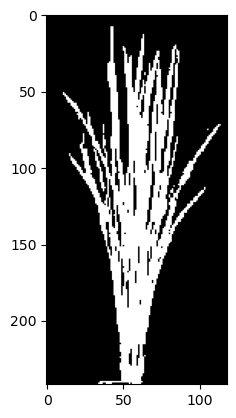

In [11]:
# pcv.threshold.binary 함수는 회색조 이미지에서 특정 임계값을 기준으로 이진화된 이미지를 생성합니다.
# 이진화는 이미지의 픽셀 값을 두 가지 값(흑백)으로 변환하는 기법으로, 여기서는 'b' 채널에서 특정 값 이상의 밝은 영역을 강조합니다.

bin_img = pcv.threshold.binary(
    gray_img=b_channel,  # 이진화할 회색조 이미지 (여기서는 'b' 채널 이미지)
    threshold=140,  # 임계값 설정 (140 이상의 값은 흰색으로, 그 이하는 검은색으로 변환)
    object_type="light"  # 밝은 물체를 강조 ('light'를 선택하면 임계값 이상은 흰색, 이하로는 검은색)
)

# bin_img: 이진화된 이미지가 저장되는 변수. 
# 결과 이미지에서 픽셀 값이 140 이상이면 흰색(1), 그 이하면 검은색(0)으로 변환됩니다.

# 요약:
# 이 코드는 'b' 채널 회색조 이미지에서 임계값 140을 기준으로 밝은 부분을 흰색, 어두운 부분을 검은색으로 변환하는 이진화 과정을 수행합니다.
# 이진화는 특정 영역을 더 명확하게 구분하고 분석할 때 유용합니다.

### 작은 객체(노이즈) 제거 및 구멍 채우기

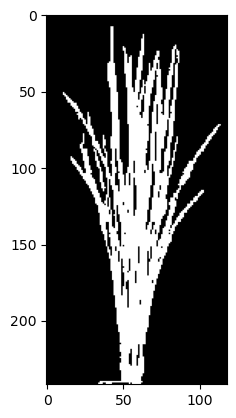

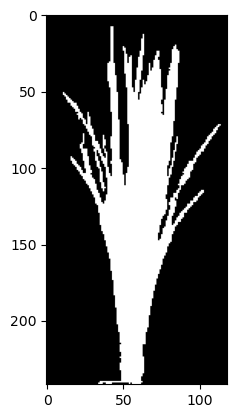

In [12]:
# 1. pcv.fill 함수: 이 함수는 이진화된 이미지에서 작은 객체(노이즈)를 제거하는 역할을 합니다.
# 'size' 파라미터는 제거할 객체의 크기를 지정하며, 이 크기보다 작은 객체들은 이미지에서 제거됩니다.
# 즉, 'size=10'으로 설정했으므로, 10 픽셀보다 작은 객체들은 삭제됩니다.

mask_fill = pcv.fill(
    bin_img=bin_img,  # 처리할 이진화된 이미지
    size=10  # 10 픽셀보다 작은 객체를 제거
)

# 2. pcv.fill_holes 함수: 이 함수는 이진화된 이미지에서 남아있는 내부의 작은 구멍들을 채우는 역할을 합니다.
# 구멍이 채워진 결과는 새로운 이진화 이미지로 반환됩니다.

mask_fill = pcv.fill_holes(
    bin_img=mask_fill  # 구멍을 채울 이진화된 이미지
)

# 요약:
# 첫 번째 함수는 이진화 이미지에서 10 픽셀보다 작은 잡음이나 객체를 제거하고,
# 두 번째 함수는 남은 구멍들을 채워서 이미지의 형태를 더 완전하게 만듭니다.
# 결과적으로 깨끗한 이진화 이미지를 얻을 수 있습니다.

### 골격화(Skeletonization) & 가지치기(Pruning)

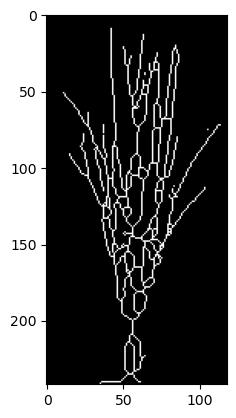

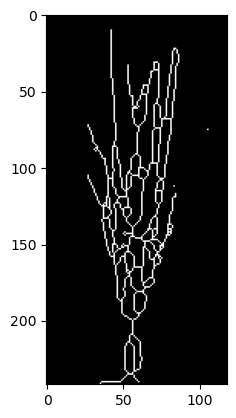

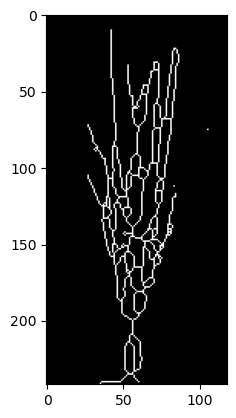

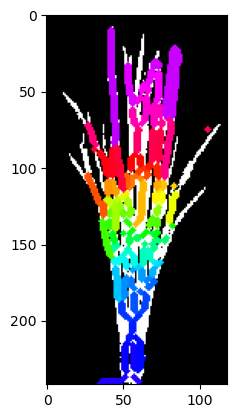

In [13]:
# 1. 골격화(Skeletonization)
# pcv.morphology.skeletonize 함수는 이진화된 이미지에서 객체의 골격을 추출하는 과정입니다.
# 골격화는 객체의 중심선을 찾아내는 작업으로, 이미지에서 물체의 가장 간단한 형태(선)를 나타냅니다.
# 'mask' 매개변수로 이진화된 이미지를 입력합니다.

skeleton = pcv.morphology.skeletonize(
    mask=bin_img  # 골격화할 이진화된 이미지
)

# 2. 가지치기(Pruning)
# pcv.morphology.prune 함수는 골격화된 이미지에서 너무 작은 가지를 제거하는 작업을 수행합니다.
# 'size' 파라미터는 제거할 가지의 길이를 지정하며, 여기서는 100 픽셀보다 작은 가지를 제거합니다.
# 'pruned_skel'에는 가지치기 후의 골격 이미지가 저장되고, 'seg_img'는 분할된 이미지,
# 'edge_objects'는 끝부분에 있는 객체들을 나타냅니다.

pruned_skel, seg_img, edge_objects = pcv.morphology.prune(
    skel_img=skeleton,  # 골격화된 이미지
    size=100,  # 100 픽셀보다 작은 가지는 제거
    mask=bin_img  # 원래 이진화된 이미지를 참조
)

# 요약:
# 1. 골격화는 이미지에서 객체의 중심선(뼈대)을 추출하여 분석할 수 있는 간단한 형태를 만듭니다.
# 2. 가지치기는 너무 짧거나 불필요한 가지를 제거하여 골격 이미지를 더 간결하게 만듭니다.
# 결과적으로, 주요 구조만 남은 간결한 형태의 골격 이미지를 얻을 수 있습니다.

### 노이즈 제거 및 구멍 채운 이후 골격화(Skeletonization) & 가지치기(Pruning) 양상

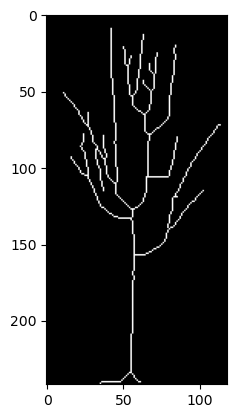

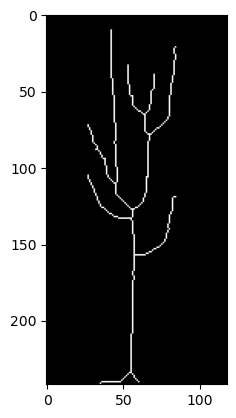

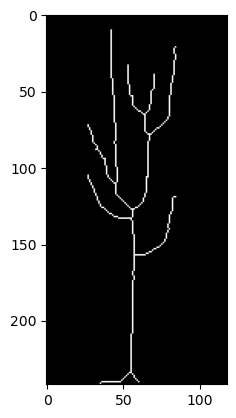

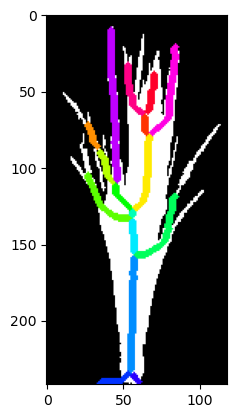

In [14]:
# 1. 골격화(Skeletonization)
# 이진화된 이미지에서 객체의 중심선(골격)을 추출합니다. 
# pcv.morphology.skeletonize 함수는 이진화된 이미지에서 객체의 뼈대를 찾아내는 함수로, 
# 이 코드는 'mask_fill' 이미지의 골격을 추출합니다.
# 골격화는 객체의 가장 간단한 선형 형태를 만들어 이미지 분석을 더 쉽게 할 수 있게 합니다. 
# (bin_img와 mask_fill 이미지의 skeletonize 결과 비교)

skeleton = pcv.morphology.skeletonize(
    mask=mask_fill  # 골격화할 이미지 (구멍이 채워진 이진화 이미지)
)

# 2. (선택적) 팽창(Dilation) - 주석 처리된 부분
# pcv.dilate 함수는 골격화된 선을 굵게 만드는 역할을 합니다.
# 'ksize=2'는 커널 크기를 2로 설정하여 선을 굵게 만들며, 'i=1'은 한 번만 팽창을 적용한다는 의미입니다.
# 주석 처리되어 실행되지 않지만, 골격을 굵게 할 필요가 있을 때 사용 가능합니다.


# skeleton_mask_dilated = pcv.dilate(
#     gray_img=skeleton,  # 팽창시킬 골격 이미지
#     ksize=2,  # 커널 크기 (굵기)
#     i=1  # 팽창을 한 번만 적용
# )

# 3. 가지치기(Pruning)
# 골격화된 이미지에서 100 픽셀 이하의 작은 가지를 제거합니다.
# pcv.morphology.prune 함수는 골격 이미지에서 불필요한 짧은 가지를 제거하여 간결한 골격 이미지를 생성합니다.
# 여기서 'size=100'으로 설정하여, 100 픽셀 이하의 짧은 가지는 제거됩니다.
# pruned_skel: 가지치기 후의 골격 이미지
# seg_img: 분할된 이미지
# edge_objects: 골격의 끝에 위치한 객체들

pruned_skel, seg_img, edge_objects = pcv.morphology.prune(
    skel_img=skeleton,  # 가지치기할 골격 이미지
    size=100,  # 100 픽셀보다 작은 가지는 제거
    mask=mask_fill  # 원래의 이진화 이미지 (구멍이 채워진 이미지)
)

# 요약:
# 이 코드는 구멍이 채워진 이진화 이미지에서 골격화 과정을 거쳐 객체의 뼈대를 추출하고,
# 가지치기를 통해 너무 짧은 가지를 제거하여 더 간결한 형태의 골격 이미지를 만듭니다.

### 골격화된 이미지에서 객체 분할 및 정렬

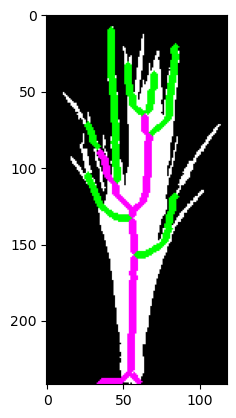

In [15]:
# pcv.morphology.segment_sort 함수는 골격화된 이미지에서 객체(leaf_obj, stem_obj)를 분할하고, 
# 이를 정렬하여 나누는 역할을 합니다.
# 이 함수는 객체를 크기나 위치 등의 기준으로 나누어 분석할 수 있도록 해줍니다.
# 여기서는 잎(leaf_obj)과 줄기(stem_obj)를 분리하고 정렬합니다.

leaf_obj, stem_obj = pcv.morphology.segment_sort(
    skel_img=pruned_skel,  # 가지치기된 골격 이미지
    objects=edge_objects,  # 골격 이미지의 끝에 위치한 객체들
    mask=mask_fill  # 원래의 이진화 이미지 (구멍이 채워진 이미지)
)

# leaf_obj: 골격화된 이미지에서 분리된 잎 객체를 저장
# stem_obj: 골격화된 이미지에서 분리된 줄기 객체를 저장

# 요약:
# 이 코드는 가지치기된 골격 이미지에서 객체를 분할하여, 잎과 줄기를 각각 분리합니다.
# 이 과정을 통해 이미지에서 잎과 줄기를 구분하고, 각각을 독립적으로 분석할 수 있습니다.

### 분리된 객체를 채우는 과정 (Fill Segments) (Watershed)

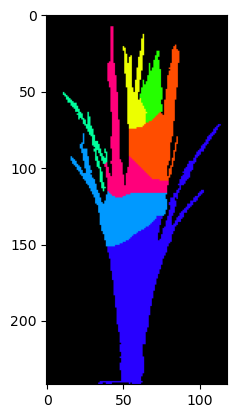

In [16]:
# pcv.morphology.fill_segments 함수는 이미지에서 분리된 객체들을 채우는 작업을 수행합니다.
# 이 함수는 분리된 객체들(여기서는 잎 객체)을 채워서 전체 모양을 복원하거나 분석하기에 더 적합한 형태로 만듭니다.
# 'label'은 출력 이미지에 표시될 텍스트로, 디버깅이나 시각화를 위해 사용됩니다.

filled_img = pcv.morphology.fill_segments(
    mask=mask_fill,  # 원래의 이진화 이미지 (구멍이 채워진 이미지)
    objects=leaf_obj,  # 채울 대상 객체 (여기서는 분리된 잎 객체)
    label="default"  # 객체에 붙일 레이블 (기본값 "default" 사용)
)

# filled_img: 채워진 객체들이 포함된 이미지가 저장됩니다.

# 요약:
# 이 코드는 잎 객체(leaf_obj)를 채워서, 이미지의 모양을 복원하거나 분석하기에 적합한 형태로 만듭니다.
# 이 과정은 이미지에서 객체의 완전한 형태를 확인하고 분석할 때 유용합니다.

### 분기점 찾기 (Branch Points Detection)

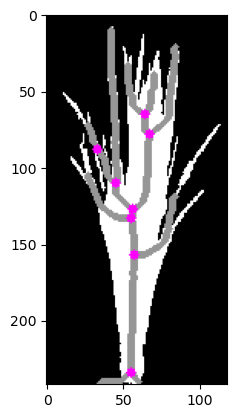

In [17]:
# pcv.morphology.find_branch_pts 함수는 골격화된 이미지에서 가지들이 교차하는 분기점을 찾아냅니다.
# 분기점은 식물의 구조적 특징을 분석할 때 중요한 정보로, 이 함수는 그 분기점들을 마스크 이미지로 표시해줍니다.
# 'label'은 디버깅이나 시각화를 위해 분기점에 붙일 텍스트입니다.

branch_pts_mask = pcv.morphology.find_branch_pts(
    skel_img=pruned_skel,  # 가지치기된 골격 이미지
    mask=mask_fill,  # 원래의 이진화된 이미지 (구멍이 채워진 이미지)
    label="default"  # 분기점에 붙일 레이블 (기본값 "default" 사용)
)

# branch_pts_mask: 분기점이 표시된 마스크 이미지가 저장됩니다.

# 요약:
# 이 코드는 골격 이미지에서 가지들이 교차하는 분기점을 찾아내고, 그 위치를 마스크 이미지로 반환합니다.
# 분기점은 식물의 구조적 분석에서 중요한 정보이며, 이를 통해 식물의 복잡한 구조를 분석할 수 있습니다.

### 끝점 찾기 (Tips Detection)

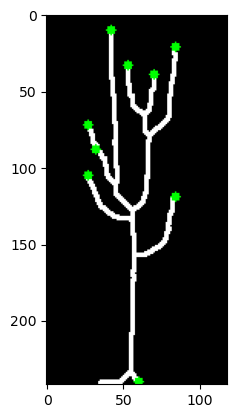

In [18]:
# pcv.morphology.find_tips 함수는 골격화된 이미지에서 끝점을 찾아냅니다.
# 끝점(tips)은 식물 구조에서 선의 마지막 부분을 나타내며, 주로 잎의 끝이나 줄기의 끝과 같은 위치입니다.
# 이 함수는 끝점의 위치를 마스크 이미지로 표시해 줍니다.
# 'label'은 끝점에 붙일 텍스트로, 디버깅이나 시각화를 위한 옵션입니다.

tip_pts_mask = pcv.morphology.find_tips(
    skel_img=pruned_skel,  # 가지치기된 골격 이미지
    mask=None,  # 특정 마스크를 사용하지 않으므로 None으로 설정
    label="default"  # 끝점에 붙일 레이블 (기본값 "default" 사용)
)

# tip_pts_mask: 끝점이 표시된 마스크 이미지가 저장됩니다.

# 요약:
# 이 코드는 골격 이미지에서 끝점을 찾아내고, 그 위치를 마스크 이미지로 반환합니다.
# 끝점은 식물 구조의 끝 부분을 나타내며, 이를 통해 식물의 세부적인 구조를 분석할 수 있습니다.

### 주석을 더 읽기 쉽게 하기 위한 파라미터 조정

In [19]:
# pcv.params.text_size: 이미지에 표시될 텍스트의 크기를 조정합니다.
# 0.3으로 설정하면 텍스트 크기가 줄어들어 주석이 더 작고 깔끔하게 표시됩니다.
pcv.params.text_size = 0.3

# pcv.params.text_thickness: 이미지에 표시될 텍스트의 두께를 조정합니다.
# 1로 설정하면 텍스트가 얇아져 더 읽기 쉬워집니다.
pcv.params.text_thickness = 1

# pcv.params.line_thickness: 이미지에서 선을 그릴 때의 두께를 조정합니다.
# 2로 설정하면 선이 너무 굵지 않게 표시되어, 이미지 주석이 더 명확하게 보이게 됩니다.
pcv.params.line_thickness = 2

# 요약:
# 이 코드는 이미지에 추가되는 주석(텍스트, 선 등)을 더 작고 가독성 있게 만들기 위한 설정입니다.
# 텍스트 크기, 텍스트 두께, 선 두께를 조정하여 이미지 분석 시 시각적 요소가 더 깔끔하고 이해하기 쉽게 변경됩니다.

### 골격 이미지에서 객체 분할 및 레이블링

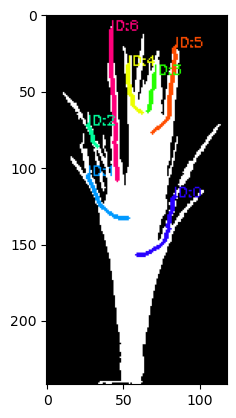

In [20]:
# pcv.morphology.segment_id 함수는 골격화된 이미지에서 분리된 객체(leaf_obj)를 식별하고,
# 각 객체에 레이블을 붙여 시각적으로 구분할 수 있게 만듭니다.
# 이 함수는 객체를 분할하고, 각 객체에 고유한 ID를 할당하여 분석할 때 유용합니다.

segmented_img, labeled_img = pcv.morphology.segment_id(
    skel_img=pruned_skel,  # 가지치기된 골격 이미지
    objects=leaf_obj,  # 분리된 잎 객체
    mask=mask_fill  # 원래의 이진화된 이미지 (구멍이 채워진 이미지)
)

# segmented_img: 분리된 객체들이 포함된 이미지 (객체가 개별적으로 분할됨)
# labeled_img: 각 객체에 고유한 ID가 할당된 이미지 (각 객체에 레이블이 붙어 있음)

# 요약:
# 이 코드는 골격 이미지에서 분리된 객체(leaf_obj)를 식별하고, 각 객체에 고유한 레이블을 할당합니다.
# 이를 통해 이미지에서 분리된 객체들을 시각적으로 구분하고, 각각을 독립적으로 분석할 수 있습니다.

### 객체의 경로 길이 계산 및 레이블링

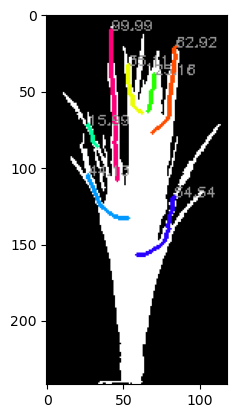

In [21]:
# pcv.morphology.segment_path_length 함수는 분리된 객체들의 경로 길이를 계산합니다.
# 경로 길이란 객체의 골격을 따라 측정한 길이를 의미합니다.
# 이 함수는 객체의 크기나 길이를 분석할 때 유용하며, 각 객체에 해당 길이를 기반으로 레이블을 붙여줍니다.

labeled_img = pcv.morphology.segment_path_length(
    segmented_img=segmented_img,  # 분리된 객체가 포함된 이미지
    objects=leaf_obj,  # 길이를 계산할 대상 객체 (여기서는 잎 객체)
    label="default"  # 각 객체에 붙일 레이블 (기본값 "default" 사용)
)

# labeled_img: 객체의 경로 길이가 계산되고, 레이블이 붙여진 이미지

# 요약:
# 이 코드는 분리된 객체(leaf_obj)의 경로 길이를 계산하고, 그 길이를 기반으로 객체에 레이블을 붙입니다.
# 이를 통해 객체의 길이 정보를 시각적으로 확인하고 분석할 수 있습니다.

### 객체의 곡률 계산 및 레이블링

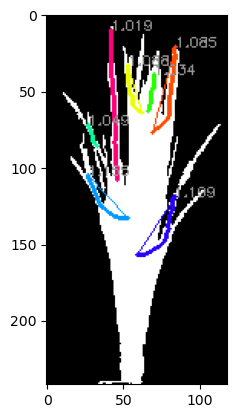

In [22]:
# pcv.morphology.segment_curvature 함수는 분리된 객체의 곡률을 계산합니다.
# 곡률은 객체가 얼마나 구부러졌는지를 나타내는 값으로, 객체의 형태 분석에서 중요한 요소입니다.
# 이 함수는 각 객체의 곡률을 측정한 후, 해당 정보를 기반으로 레이블을 붙여줍니다.

labeled_img = pcv.morphology.segment_curvature(
    segmented_img=segmented_img,  # 분리된 객체가 포함된 이미지
    objects=leaf_obj,  # 곡률을 계산할 대상 객체 (여기서는 잎 객체)
    label="default"  # 각 객체에 붙일 레이블 (기본값 "default" 사용)
)

# labeled_img: 객체의 곡률이 계산되고, 레이블이 붙여진 이미지

# 요약:
# 이 코드는 분리된 객체(leaf_obj)의 곡률을 계산하고, 그 곡률을 기반으로 객체에 레이블을 붙입니다.
# 이를 통해 객체의 곡률 정보를 시각적으로 확인하고 분석할 수 있습니다.


### 객체의 크기 분석 및 시각화

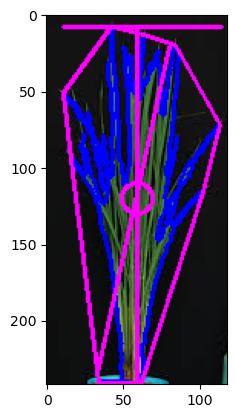

In [23]:
# pcv.analyze.size 함수는 이미지에서 객체의 크기를 분석하는 함수입니다.
# 객체의 면적, 너비, 높이 등의 다양한 크기 정보를 측정한 후, 그 결과를 시각적으로 표시합니다.
# 'labeled_mask'는 분석할 객체를 지정하는 이진화된 마스크 이미지입니다.

shape_img = pcv.analyze.size(
    img=img,  # 분석할 원본 이미지
    labeled_mask=mask_fill,  # 크기를 분석할 객체가 포함된 마스크 이미지
    label="default"  # 시각화 시 레이블로 표시할 텍스트 (기본값 "default" 사용)
)

# shape_img: 분석 결과가 시각적으로 표시된 이미지

# 요약:
# 이 코드는 객체의 크기(면적, 너비, 높이 등)를 분석하고, 그 결과를 이미지로 반환합니다.
# 이를 통해 이미지에서 객체의 크기 정보를 시각적으로 확인하고 분석할 수 있습니다.

### 분석 결과를 JSON 파일로 저장

In [29]:
# pcv.outputs.save_results 함수는 분석된 결과를 JSON 형식의 파일로 저장하는 함수입니다.
# 'filename' 파라미터는 저장될 파일의 경로와 이름을 지정합니다.
file_path = args.outdir  # 저장된 파일의 경로
file_path = os.path.join(file_path, args.result)  # 파일 이름을 경로에 추가
print(file_path)
pcv.outputs.save_results(
    filename=file_path  # 분석 결과를 저장할 파일 경로와 이름 (args.result에서 지정한 파일)
)

# JSON 파일 불러오기
import json  # JSON 형식의 데이터를 읽고 쓰기 위한 라이브러리

# 저장된 JSON 파일을 불러옵니다.
with open(file_path, 'r') as file:  # 파일을 읽기 모드로 열기
    data = json.load(file)  # JSON 데이터를 Python 객체로 변환

# 데이터 요약 표시
# 저장된 JSON 파일에서 'observations' 항목의 구조를 요약하여 출력합니다.
# 'default_1'은 분석 결과가 저장된 기본 그룹이며, 여기서 키와 값의 타입을 요약하여 출력합니다.
summary = {key: type(value) for key, value in data['observations']['default_1'].items()}
print(summary)  # 결과를 출력하여 구조와 타입을 확인

../results/PlantCV/example_results_image_file.json
{'in_bounds': <class 'dict'>, 'area': <class 'dict'>, 'convex_hull_area': <class 'dict'>, 'solidity': <class 'dict'>, 'perimeter': <class 'dict'>, 'width': <class 'dict'>, 'height': <class 'dict'>, 'longest_path': <class 'dict'>, 'center_of_mass': <class 'dict'>, 'convex_hull_vertices': <class 'dict'>, 'object_in_frame': <class 'dict'>, 'ellipse_center': <class 'dict'>, 'ellipse_major_axis': <class 'dict'>, 'ellipse_minor_axis': <class 'dict'>, 'ellipse_angle': <class 'dict'>, 'ellipse_eccentricity': <class 'dict'>}


### 관측 데이터 정의 및 처리

In [30]:
import pandas as pd  # 데이터를 처리하고 CSV 파일로 저장하기 위해 pandas 라이브러리를 사용

observations = data['observations']  # JSON 파일에서 'observations' 부분을 추출

# 관측 데이터를 저장할 빈 리스트 생성
rows = []

# 관측 데이터를 반복 처리
# observations.items()로 각 관측값을 가져와 처리
for obs_key, obs_val in observations.items():
    for trait, trait_val in obs_val.items():
        # 긴 리스트 형태의 데이터(색상 빈도 데이터)는 제외
        if trait not in ['blue_frequencies', 'green_frequencies', 'red_frequencies']:
            # 'center_of_mass'나 'ellipse_center' 같은 특성들은 x와 y 좌표로 분리하여 저장
            if trait in ['center_of_mass', 'ellipse_center']:
                # x 좌표 데이터를 저장하는 딕셔너리 생성
                row_x = {
                    'Observation': obs_key,  # 관측 그룹
                    'Trait': f"{trait}_x",  # 특성 이름(x 좌표)
                    'Value': trait_val['value'][0],  # x 좌표 값
                    'Method': trait_val.get('method', ''),  # 측정 방법
                    'Scale': trait_val.get('scale', ''),  # 측정 단위
                    'Datatype': str(trait_val.get('datatype', '')),  # 데이터 타입
                    'Label': 'x'  # 레이블(x)
                }
                # y 좌표 데이터를 저장하는 딕셔너리 생성
                row_y = {
                    'Observation': obs_key,  # 관측 그룹
                    'Trait': f"{trait}_y",  # 특성 이름(y 좌표)
                    'Value': trait_val['value'][1],  # y 좌표 값
                    'Method': trait_val.get('method', ''),  # 측정 방법
                    'Scale': trait_val.get('scale', ''),  # 측정 단위
                    'Datatype': str(trait_val.get('datatype', '')),  # 데이터 타입
                    'Label': 'y'  # 레이블(y)
                }
                # 리스트에 x와 y 좌표 데이터를 추가
                rows.append(row_x)
                rows.append(row_y)
            else:
                # 일반적인 특성들은 직접 추가
                row = {
                    'Observation': obs_key,  # 관측 그룹
                    'Trait': trait,  # 특성 이름
                    'Value': trait_val['value'],  # 특성 값
                    'Method': trait_val.get('method', ''),  # 측정 방법
                    'Scale': trait_val.get('scale', ''),  # 측정 단위
                    'Datatype': str(trait_val.get('datatype', '')),  # 데이터 타입
                    'Label': trait_val.get('label', '')  # 레이블
                }
                rows.append(row)

# 수집된 데이터를 pandas DataFrame으로 변환
df_corrected = pd.DataFrame(rows)

# DataFrame을 CSV 파일로 저장
corrected_csv_file_path = '../results/PlantCV/plant_observations.csv'  # 출력할 파일 경로 지정
df_corrected.to_csv(corrected_csv_file_path, index=False)  # 인덱스 없이 CSV로 저장

# 생성된 CSV 파일 경로 출력
print(corrected_csv_file_path)


../results/PlantCV/plant_observations.csv


### 특정 관측값 필터링

In [31]:
# df_corrected에서 'Observation' 값이 'default_1'부터 'default_5'까지인 행만 선택
filtered_df = df_corrected[df_corrected['Observation'].isin(['default_1', 'default_2', 'default_3', 'default_4', 'default_5'])]

# 피벗 테이블 생성
# 피벗 테이블은 데이터를 'Trait'을 기준으로 행으로 나열하고, 'Observation'을 열로 설정하여
# 각 'Observation'에 해당하는 'Value'(값)를 표시하는 표를 만듭니다.
# 'aggfunc'는 중복된 값이 있을 경우 첫 번째 값을 사용하도록 지정합니다.
pivot_df = filtered_df.pivot_table(
    index='Trait',  # 행으로 사용할 열 (특성)
    columns='Observation',  # 열로 사용할 관측값
    values='Value',  # 셀에 표시될 값
    aggfunc='first'  # 중복된 값이 있을 경우 첫 번째 값을 사용
)

# 피벗된 테이블 출력
pivot_df


Observation,default_1
Trait,
area,7343.0
center_of_mass_x,59.251124
center_of_mass_y,120.648509
convex_hull_area,15480.0
convex_hull_vertices,12
ellipse_angle,4.027881
ellipse_center_x,57.61935
ellipse_center_y,117.971397
ellipse_eccentricity,0.932237
